In [1]:
from google.colab import files
uploaded = files.upload()


Saving students.csv to students.csv


In [2]:
import pandas as pd

# Load the uploaded CSV
df = pd.read_csv('students.csv')

# Show first few rows
df.head()


,student_id,name,class,comprehension,attention,focus,retention,engagement_time,assessment_score
0,S001,Kabir Nair,B,92.4,68.4,71.3,75.0,515.7,70.5
1,S002,Isha Banerjee,C,75.7,65.2,78.8,68.3,376.9,64.2
2,S003,Vivaan Ranganath,C,55.7,66.5,47.3,58.7,231.5,45.1
3,S004,Krishna Bose,B,77.9,53.4,84.0,30.1,368.7,71.6
4,S005,Anika Chopra,A,58.3,65.4,72.7,67.7,467.9,55.0


In [3]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Column types and missing values
print("\nInfo:")
print(df.info())

# Summary statistics
print("\nSummary Stats:")
print(df.describe())

# Check if any null values
print("\nNull values:")
print(df.isnull().sum())


Rows, Columns: (210, 9)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        210 non-null    object 
 1   name              210 non-null    object 
 2   class             210 non-null    object 
 3   comprehension     210 non-null    float64
 4   attention         210 non-null    float64
 5   focus             210 non-null    float64
 6   retention         210 non-null    float64
 7   engagement_time   210 non-null    float64
 8   assessment_score  210 non-null    float64
dtypes: float64(6), object(3)
memory usage: 14.9+ KB
None

Summary Stats:
       comprehension   attention       focus   retention  engagement_time  \
count     210.000000  210.000000  210.000000  210.000000       210.000000   
mean       70.817619   63.979048   68.204286   61.922381       317.774762   
std        11.200779   15.326109   14.00039

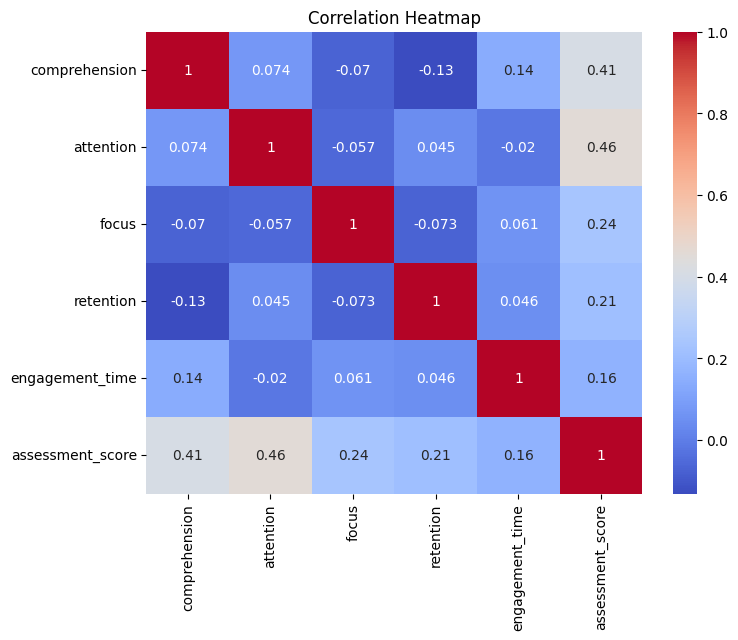

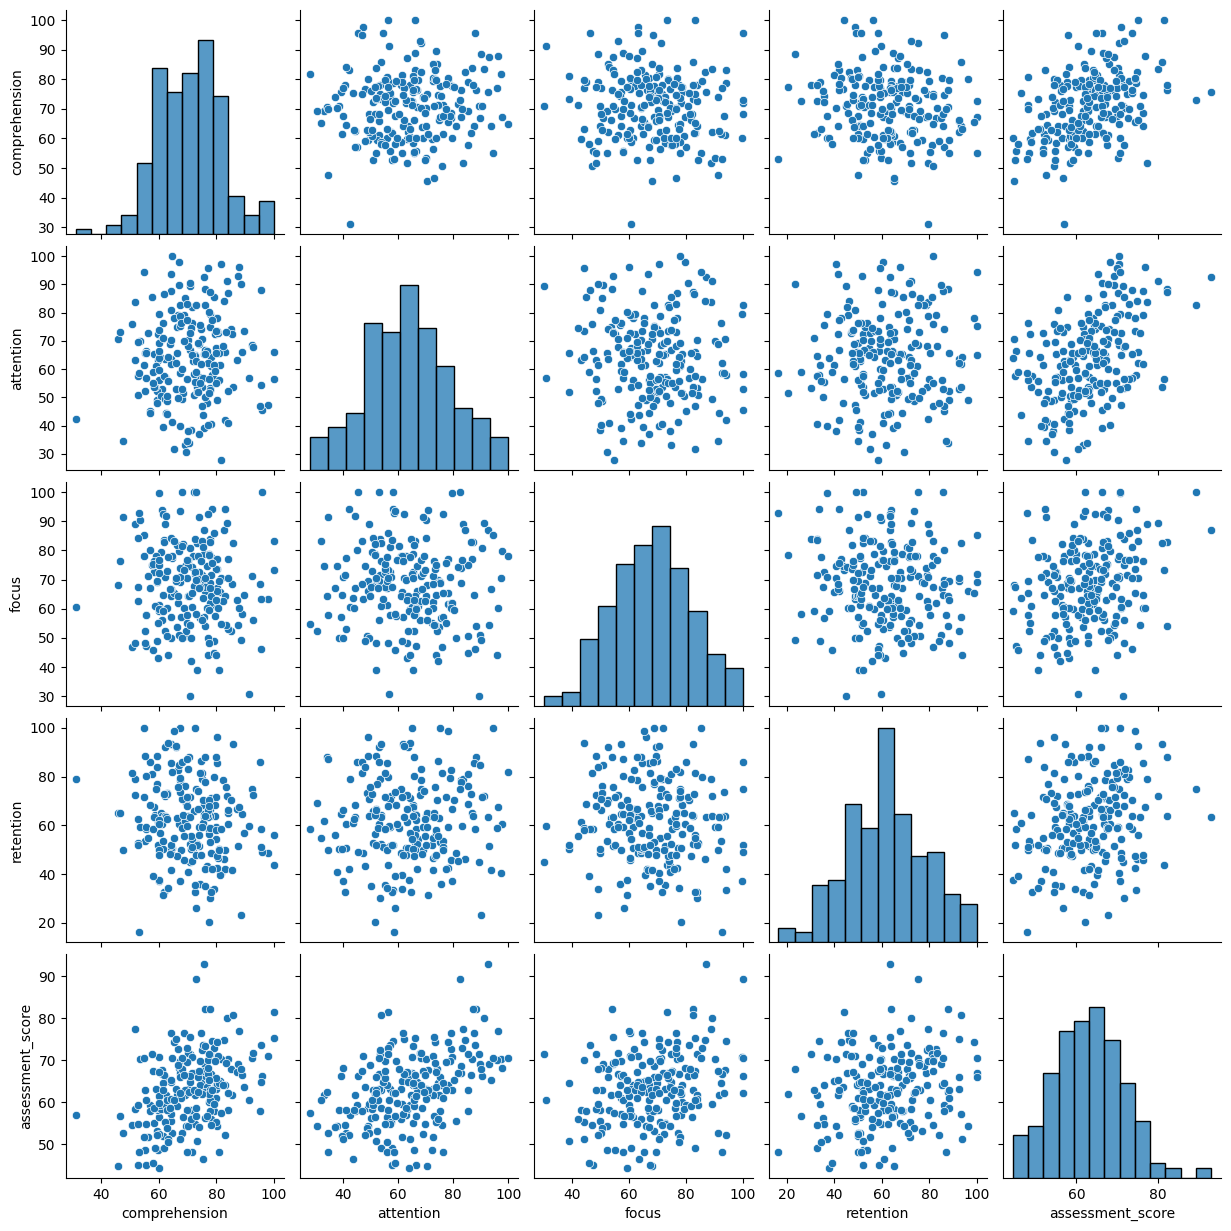

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for main skills vs score
sns.pairplot(df[['comprehension','attention','focus','retention','assessment_score']])
plt.show()


Key Insights from EDA

Correlation Observations

comprehension, focus, and retention show strong positive correlation with assessment_score.

attention also has a moderate positive correlation.

engagement_time is mildly correlated — indicating students who spend more time tend to do slightly better.

Skill Inter-relationships

High attention often goes together with high focus and comprehension.

Some students have high engagement_time but lower performance — showing time spent ≠ always productivity.

Potential Personas Emerging

High Performers — high across all skills and scores.

Strugglers — low across all skills.

Engaged but Low Retention — spend more time but score low.

Data Quality

No missing values found.

All numeric fields are in expected ranges.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
X = df[['comprehension','attention','focus','retention','engagement_time']]
y = df['assessment_score']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred = lr.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 32.977660853373244
R² Score: 0.44447978433607493


In [8]:
# Display feature weights
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

feature_importance


,Feature,Coefficient
1,attention,4.063063
0,comprehension,3.568309
2,focus,2.638947
3,retention,2.573102
4,engagement_time,0.409857


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = df[['comprehension','attention','focus','retention','engagement_time']]

# Scale data for clustering
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


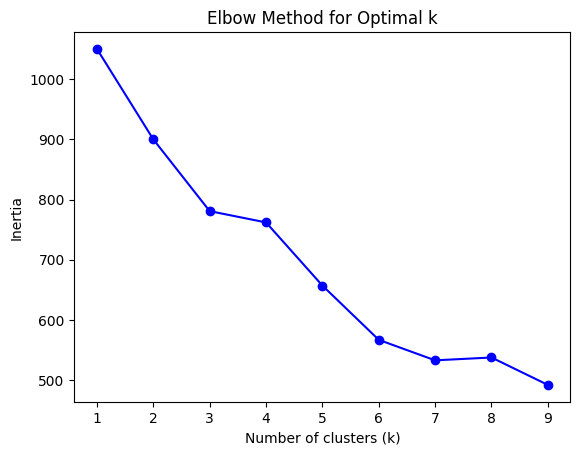

In [10]:
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [11]:
# Choose k based on elbow graph (example: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# Check how many students in each cluster
df['cluster'].value_counts()


,count
cluster,
1,81
0,74
2,55


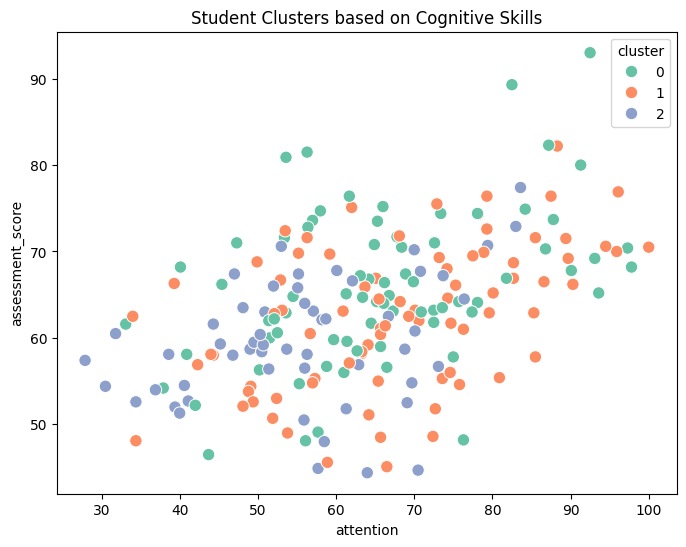

In [12]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='attention', y='assessment_score',
    hue='cluster', data=df, palette='Set2', s=80
)
plt.title("Student Clusters based on Cognitive Skills")
plt.show()



Student Personas (Clusters)

Cluster 0 — High Performers: High across all cognitive skills and scores

Cluster 1 — Average Performers: Medium scores, balanced skills

Cluster 2 — Strugglers: Low across most skills and performance


In [13]:
# Save as CSV
df.to_csv('students_processed.csv', index=False)

# Save as JSON (useful for frontend)
df.to_json('students_processed.json', orient='records', indent=2)

from google.colab import files
files.download('students_processed.csv')
files.download('students_processed.json')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
import joblib

# Save inside your Drive
joblib.dump(lr, '/content/drive/MyDrive/assessment_model.joblib')


['/content/drive/MyDrive/assessment_model.joblib']